### 정규식 실전 분석해보기!

In [2]:
import pandas as pd
import re

In [3]:
## 리스트안에 특정 값이 있는데, 그 값 중에서 내가 원하는 문자열만 추출하는 경우!

a= ['사원','홍길동사원','임꺽정대리','김영희사원','손흥민팀장']



In [4]:
a

['홍길동사원', '임꺽정대리', '김영희사원', '손흥민팀장']

__contains__ 파이썬에서 string 클래스 메서드, 주어진 하위 문자열에 대해서 찾을 수있다! 있는 지 없는지!

In [6]:
##사원 추출하고 싶은 경우!
a[0].__contains__('사원')

c=[]
for i in range(len(a)):
    if a[i].__contains__('사원'):
        print(a[i])
        c.append(a[i])
print(c)

홍길동사원
김영희사원
['홍길동사원', '김영희사원']


In [7]:
c

['홍길동사원', '김영희사원']

### 실전 예제를 통한 분석!

In [22]:
df = pd.read_csv('survey_1.csv')

In [10]:
df['comment']

0            역앞에 젊은이들이 모여있다(AA역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

In [11]:
df.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [23]:
df_1 = df.dropna()

In [13]:
df_1

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


#### 소괄호가 있어서 이걸 정규식을 이용해서 삭제
#### 알파벳을 정규식을 이용해서 삭제

string 문자열을 전처리할 때 pandas 제공

str.--- 판다스 제공하는 문자열 전처리 코드 

In [ ]:
df_1['comment'].str.replace('',)

In [24]:
df_1['comment'] =df_1['comment'].str.replace('(', "")


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_1['comment'] =df_1['comment'].str.replace(')', "")


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:

df_1['comment'] =df_1['comment'].str.replace('[a-zA-Z]', "")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_1['comment']

0                역앞에 젊은이들이 모여있다역
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3       어린이집에 바로 입원할 수 있다대기아동 없음
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 84, dtype: object

In [28]:
df_1.comment.value_counts()

고속도로로 나가는 길이 좁아서 정체가 심하다. 확장해 주었으면 좋겠다    1
길이 깨끗하다                                   1
역앞 상가가 쓸쓸하다                               1
앙케이트를 제대로 확인하고 거리조성에 반영해주고 있는 자세가 좋다.     1
시의 홈페이지가 깨끗하고 알기 쉽다                       1
                                         ..
관공서에 상담하러 갔을 때, 매우 친절하게 대해 주었다            1
유명한 기업이 많다                                1
스포츠 센터가 있어서 자주 이용하고 있다                    1
가로수 낙엽 청소가 힘들다. 가로수 다 잘라버리자               1
육아 지원이 좋다                                 1
Name: comment, Length: 84, dtype: int64

In [30]:
df_1['comment'].str.len() #문자열의 전체 길이 

0     15
1     21
2      9
3     24
4     11
      ..
81    22
82    26
83    15
84    14
85    17
Name: comment, Length: 84, dtype: int64

In [31]:
df_1['str_len'] = df_1['comment'].str.len() #문자열의 전체 길이 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_1

,datetime,comment,satisfaction,str_len
0,2019-03-11,역앞에 젊은이들이 모여있다역,1,15
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다대기아동 없음,4,24
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [33]:
df_1.str_len.mean()

19.928571428571427

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([20., 18., 20., 11.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <a list of 10 Patch objects>)

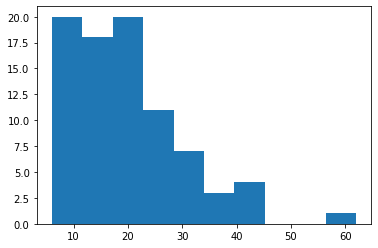

In [36]:
plt.hist(df_1['str_len'])


### 서베이 데이터를 가지고 우선적으로 형태소를 분석할 예정!
- 명사, 동사, 전치사

In [37]:
df_1['comment']


0                역앞에 젊은이들이 모여있다역
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3       어린이집에 바로 입원할 수 있다대기아동 없음
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 84, dtype: object

### 형태소 분석 konlpy

In [38]:
from konlpy.tag import Twitter

In [39]:
twt = Twitter()

/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [40]:
text = '여러분, 이제 곧 시험이네요! 그리고 3기도 끝날 시간이 다가와서 너무 아쉬워요! 끝까지 남아서 함께해 주시는 모든 분들 감사합니다!'

In [41]:
text

'여러분, 이제 곧 시험이네요! 그리고 3기도 끝날 시간이 다가와서 너무 아쉬워요! 끝까지 남아서 함께해 주시는 모든 분들 감사합니다!'

In [42]:
twt.pos(text)

[('여러분', 'Noun'),
 (',', 'Punctuation'),
 ('이제', 'Noun'),
 ('곧', 'Noun'),
 ('시험', 'Noun'),
 ('이네', 'Josa'),
 ('요', 'Noun'),
 ('!', 'Punctuation'),
 ('그리고', 'Conjunction'),
 ('3', 'Number'),
 ('기도', 'Noun'),
 ('끝날', 'Verb'),
 ('시간', 'Noun'),
 ('이', 'Josa'),
 ('다가와서', 'Verb'),
 ('너무', 'Adverb'),
 ('아쉬워요', 'Adjective'),
 ('!', 'Punctuation'),
 ('끝', 'Noun'),
 ('까지', 'Josa'),
 ('남아', 'Noun'),
 ('서', 'Josa'),
 ('함께해', 'Verb'),
 ('주시', 'Noun'),
 ('는', 'Josa'),
 ('모든', 'Noun'),
 ('분들', 'Suffix'),
 ('감사합니다', 'Verb'),
 ('!', 'Punctuation')]

### 내가 원하는 품사만 가지고 와서 리스트로 만들어 볼 수 있다!

In [43]:
df_1

,datetime,comment,satisfaction,str_len
0,2019-03-11,역앞에 젊은이들이 모여있다역,1,15
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다대기아동 없음,4,24
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


In [46]:
# 리스트에 품사 넣기!
# Noun 명사

all_words = []
parts = ['Verb']
for i in range(len(df_1)):
    text=df_1['comment'].iloc[i]
    words = twt.pos(text)
    words_nou = []
    for n in words:
        if n == 'EOS' or n =='':continue
        words_tmp = n[0] #실제 서베이 데이터가 들어감
        part = n[1] #형태소
        if not (part in parts): continue
        words_nou.append(words_tmp)
    all_words.extend(words_nou)
print(all_words)

['모여있다', '할', '할', '하게', '했으면', '가는게', '쉽다', '갖고', '싶다', '만들었으면', '갖고', '싶다', '해', '주었으면', '한다', '하기에는', '주었으면', '한다', '오면', '늘렸으면', '온다', '쉽다', '할', '걸어온', '주길', '바란다', '적은', '다루어지고', '해', '주길', '바란다', '날것', '해달라', '해', '주길', '바란다', '잘라', '버리자', '되어', '해주길', '바란다', '적다', '되어', '적고', '만들어', '주길', '바란다', '바뀐다', '해서', '해', '주었으면', '한다', '멈춰서', '나가기', '쉽고', '늘려', '주길', '바란다', '늘려', '줬으면', '생긴', '해주고', '해', '들지', '않는다', '지어', '주었으면', '한다', '열리면', '해시의', '알기', '쉽게', '해', '주었으면', '한다', '알기', '쉽다', '되지', '않는다', '늘려', '해주세요', '지내기', '하러', '갔을', '주었다', '나가는', '해', '주었으면', '만들면', '적어서', '할', '적다', '늘렸으면', '적다']


### 필수과제 
- 시계열, 문자열, 점수(스코어링) 

- Insight, 데이터 분석 보고서 만들어 보기!

- 23년 1월 수업 전까지 과제 제출하기!
### 23년 1월 1일 이후 2 번정도 수업을 진행 할 예정, 2 번 진행 후 마칠 것